<a href="https://colab.research.google.com/github/yyoshiaki/drbonodojo_3-6/blob/master/drbonodojo3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.6 データ統合解析

## リファレンスデータセット


### 遺伝子アノテーションデータ

p172〜にならってBiomartからKEGG Pathway and Enzyme IDとGene nameを抽出し、glycolysis(KEGG Pathway ID 00010)の遺伝子を抜き出す。せっかくなのでPythonでやってみよう！

最新版ではGRCh38.p13になっていた。

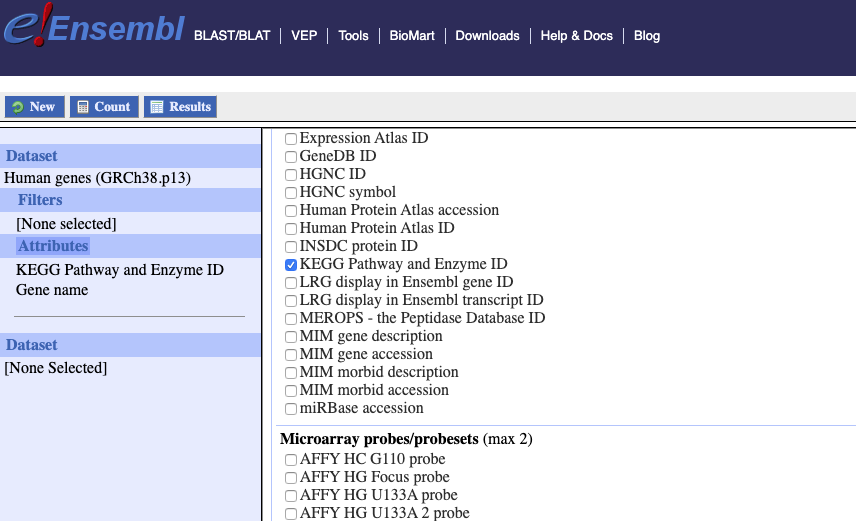

In [0]:
# pandasというデータフレーム処理のライブラリを読み込む。もっともよく使うライブラリ。
import pandas as pd

In [0]:
# mart_export.txtをdfという変数に格納。
df = pd.read_csv('https://raw.githubusercontent.com/yyoshiaki/drbonodojo_3-6/master/mart_export.txt', sep='\t')
df.head()

,KEGG Pathway and Enzyme ID,Gene name
0,NaN,MT-ND1
1,00190+7.1.1.2,MT-ND2
2,00190+1.9.3.1,MT-CO1
3,NaN,MT-CO2
4,NaN,MT-ATP8


In [0]:
# タブで始まる（pandasだと読み込み時にNanになる）行を削除。
df = df.dropna(subset=['KEGG Pathway and Enzyme ID'])
df.head()

,KEGG Pathway and Enzyme ID,Gene name
1,00190+7.1.1.2,MT-ND2
2,00190+1.9.3.1,MT-CO1
9,00190+7.1.1.2,MT-ND4
10,00190+7.1.1.2,MT-ND5
173,00240+2.7.4.6,NME8


In [0]:
# プラス記号をsplitする。
df = pd.concat([df, df['KEGG Pathway and Enzyme ID'].str.split('+', expand=True)[[0,1]]], axis=1)
df.head()

,KEGG Pathway and Enzyme ID,Gene name,0,1
1,00190+7.1.1.2,MT-ND2,00190,7.1.1.2
2,00190+1.9.3.1,MT-CO1,00190,1.9.3.1
9,00190+7.1.1.2,MT-ND4,00190,7.1.1.2
10,00190+7.1.1.2,MT-ND5,00190,7.1.1.2
173,00240+2.7.4.6,NME8,00240,2.7.4.6


In [0]:
# 列を整理する。
df.columns = ['KEGG Pathway and Enzyme ID', 'Gene name', 'KEGG Pathway ID', 'Enzyme ID']
df = df[['KEGG Pathway ID', 'Enzyme ID', 'Gene name']]
df.head()

,KEGG Pathway ID,Enzyme ID,Gene name
1,00190,7.1.1.2,MT-ND2
2,00190,1.9.3.1,MT-CO1
9,00190,7.1.1.2,MT-ND4
10,00190,7.1.1.2,MT-ND5
173,00240,2.7.4.6,NME8


In [0]:
# 00010で始まる行だけ抜き出して第2列でソートし、df_glycolysisという変数に格納。
df_glycolysis = df[df['KEGG Pathway ID'] == '00010'].sort_values(by='Enzyme ID')
df_glycolysis.head()

,KEGG Pathway ID,Enzyme ID,Gene name
24838,00010,1.1.1.1,ADH5
37909,00010,1.1.1.1,ADH7
37896,00010,1.1.1.1,ADH7
37861,00010,1.1.1.1,ADH7
37840,00010,1.1.1.1,ADH7


In [0]:
# 重複を削除して遺伝子名を抽出。
df_glycolysis['Gene name'].unique()

array(['ADH5', 'ADH7', 'ADH4', 'LDHA', 'LDHAL6A', 'LDHC', 'LDHB',
       'LDHAL6B', 'GAPDH', 'GAPDHS', 'PDHA1', 'PDHB', 'PDHA2', 'DLD',
       'DLAT', 'HK3', 'GCK', 'HK1', 'HKDC1', 'HK2', 'PFKM', 'PFKP',
       'PFKL', 'PKM', 'PKLR', 'PGK1', 'PGK2', 'FBP1', 'FBP2', 'G6PC2',
       'G6PC3', 'G6PC', 'PCK2', 'PCK1', 'ALDOB', 'ALDOA', 'ALDOC',
       'AC093512.2', 'ENO2', 'ENO3', 'ENO4', 'ENO1', 'GALM', 'TPI1',
       'GPI', 'AC092073.1', 'BPGM', 'PGAM4', 'PGAM1', 'PGAM2', 'ACSS1',
       'ACSS3', 'AACS', 'ACSS2'], dtype=object)

In [0]:
# 抜き出した遺伝子を表示
for g in df_glycolysis['Gene name'].unique():
  print(g)

ADH5
ADH7
ADH4
LDHA
LDHAL6A
LDHC
LDHB
LDHAL6B
GAPDH
GAPDHS
PDHA1
PDHB
PDHA2
DLD
DLAT
HK3
GCK
HK1
HKDC1
HK2
PFKM
PFKP
PFKL
PKM
PKLR
PGK1
PGK2
FBP1
FBP2
G6PC2
G6PC3
G6PC
PCK2
PCK1
ALDOB
ALDOA
ALDOC
AC093512.2
ENO2
ENO3
ENO4
ENO1
GALM
TPI1
GPI
AC092073.1
BPGM
PGAM4
PGAM1
PGAM2
ACSS1
ACSS3
AACS
ACSS2


In [0]:
# 抜き出した遺伝子を保存。
pd.DataFrame(df_glycolysis['Gene name'].unique()).to_csv('genes_00010.txt', index=None, header=None)

# 新しいセクション